# 1.1.4 Измерение интенсивности радиационного фона
19 марта 2019

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings; warnings.simplefilter('ignore');

## Задание 6

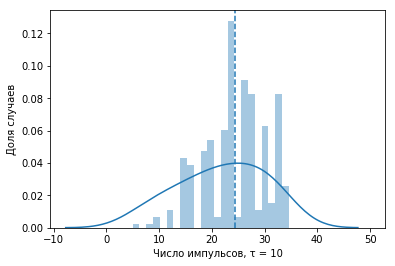

In [2]:
data = pd.read_csv('data2.tsv', sep='\t', index_col='imp')
fig, ax = plt.subplots()
sns.distplot(data.index, hist_kws={'weights': data['quant'], 'range': (5,50)}, bins=35, ax=ax);
ax.set_xlabel('Число импульсов, τ = 10'), ax.set_ylabel('Доля случаев');
n_mean_10 = sum(data.index.values * data[['occ']].values.flatten()) / sum(data[['occ']].values)[0]
sigma_10_sq = sum(data.apply(lambda x: (x.name - n_mean_10)**2 * int(x.occ), axis=1)) / sum(data[['occ']].values)[0]
sigma_10 = sigma_10_sq**0.5
quantity_within_sigma_10 = sum(np.vectorize(lambda x: abs(x - n_mean_10) <= sigma_10)(data.index.values) * data[['occ']].values.flatten()) / sum(data[['occ']].values.flatten())
quantity_within_2sigma_10 = sum(np.vectorize(lambda x: abs(x - n_mean_10) <= 2 * sigma_10)(data.index.values) * data[['occ']].values.flatten()) / sum(data[['occ']].values.flatten())
ax.axvline(n_mean_10, linestyle='--');

In [3]:
(data.index.values - n_mean_10) * data[['occ']].values.flatten()

array([ -18.35933148,  -16.35933148,  -43.07799443,  -61.79665738,
       -186.46796657,  -18.71866295, -150.46796657, -101.74930362,
        -32.15598886, -108.98328691,  -10.07799443,  -66.06128134,
        -12.23398329,  -17.96657382,    1.92200557,   68.90807799,
         18.48467967,  112.86072423,   23.20334262,  163.57938719,
         46.48467967,  267.42339833,   25.92200557,  115.68802228])

Среднее по выборке отражено на графике пунктирной линией.

In [4]:
data

,occ,quant
imp,,
6,1,0.0025
8,1,0.0025
10,3,0.0075
12,5,0.0125
14,18,0.0450
15,2,0.0050
16,18,0.0450
18,16,0.0400
19,6,0.0150


## Задание 7

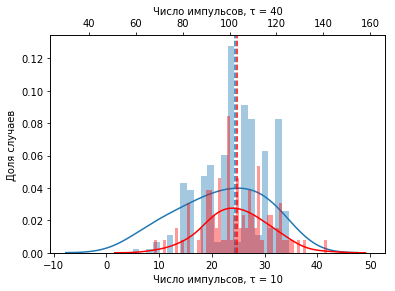

In [5]:
data = pd.read_csv('data.tsv', sep='\t', index_col='exp')
a = np.concatenate([(data[[str(2*i+1)]].values + data[[str(2*i+2)]].values).flatten() for i in range(5)])
n_mean_40 = sum(a) / len(a)
sigma_40_sq = sum((a - n_mean_40)**2) / len(a)
sigma_40 = sigma_40_sq**0.5
quantity_within_sigma_40 = sum(np.vectorize(lambda x: abs(x - n_mean_40) <= sigma_40)(a)) / len(a)
quantity_within_2sigma_40 = sum(np.vectorize(lambda x: abs(x - n_mean_40) <= 2 * sigma_40)(a)) / len(a)


twin = ax.twiny()
sns.distplot(a, bins=a.shape[0], hist_kws={'range': (30,160)}, color='r', ax=twin);
twin.axvline(n_mean_40, color='r', linestyle='--');
twin.set_xlabel('Число импульсов, τ = 40')
fig

In [6]:
data

,1,2,3,4,5,6,7,8,9,10
exp,,,,,,,,,,
0,54,48,30,42,64,48,66,50,60,48
10,60,44,50,44,46,52,57,57,58,44
20,54,38,42,57,54,67,48,64,63,42
30,64,42,56,44,53,69,57,36,54,50
40,64,60,62,51,43,48,42,52,44,57
50,58,62,40,73,40,48,39,54,52,53
60,51,61,57,35,73,56,45,47,42,40
70,44,62,52,40,51,42,36,60,58,42
80,46,57,70,56,47,76,58,49,38,42


## Задание 8

In [7]:
print(f'{n_mean_10:.2f}, {n_mean_10**0.5:.2f}, {sigma_10:.2f}')
      
print(f'{n_mean_40:.2f}, {n_mean_40**0.5:.2f}, {sigma_40:.2f}')

24.36, 4.94, 5.82
103.11, 10.15, 13.43


$\overline{n_{10}} = 24.36$  
$\sqrt{\overline{n_{10}}} = 4.94$  
$\sigma_{10} = 5.82$

$\overline{n_{40}} = 103.11$  
$\sqrt{\overline{n_{40}}} = 10.15$  
$\sigma_{40} = 13.43$

## Задание 9

In [8]:
print(f'{quantity_within_sigma_10:.2f}, {quantity_within_2sigma_10:.2f}')
print(f'{quantity_within_sigma_40:.2f}, {quantity_within_2sigma_40:.2f}')

0.66, 0.97
0.71, 0.96


**τ = 10**:  
В коридоре 1σ: 66%  
В коридоре 2σ: 97%  

**τ = 40**:  
В коридоре 1σ: 71%  
В коридоре 2σ: 96%  

Эти значения хорошо совпадают с теоретическими.